# Normal modes of Spherical Shallow Water waves using Dedalus3

In [1]:
import numpy as np
import dedalus.public as d3
import logging
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm, colors

logger = logging.getLogger(__name__)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["New Century Schoolbook"],
    "figure.figsize": (7,4),
    "figure.constrained_layout.use": True
})

def simpleaxis(ax,xlabel,ylabel,rotation=90):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.set_xlabel(xlabel,size=18)
    ax.set_ylabel(ylabel,size=18,rotation=rotation)
    return ax

In [2]:
# Parameters
mMax    = 32
Nphi    = 128
Ntheta  = 64
dtype   = np.complex128

In [3]:
# Bases
coords = d3.S2Coordinates('phi', 'theta')
dist   = d3.Distributor(coords, dtype=dtype)
basis  = d3.SphereBasis(coords, (Nphi, Ntheta), radius=1, dtype=dtype)
# Fields
u = dist.VectorField(coords, name='u', bases=basis)
h = dist.Field(name='h', bases=basis)
ω = dist.Field(name='ω')
# Substitutions
zcross = lambda A: d3.MulCosine(d3.skew(A))

In [9]:
# Simulation param
ϵ           = 0.5 #2/lamb parameter
tol         = 1e3 #truncation of eigenvalues
# omegaTarget = 1   #for eigenmode grabbing

ms      = []
omegas  = []
# modes   = [] #one mode per m, closest to omegaTarget
rangeMs = range(-mMax+1,mMax+1,1)

for m in rangeMs:
    # Problem
    problem = d3.EVP([u,h], eigenvalue=ω, namespace=locals())
    problem.add_equation("-ω*u  + ϵ*grad(h) + 2*zcross(u)  = 0")
    problem.add_equation("-ω*h  + ϵ*div(u)                 = 0")
    
    # Solve
    solver     = problem.build_solver()
    subproblem = solver.subproblems_by_group[(m, None)]
    solver.solve_dense(subproblem)
    evals      = solver.eigenvalues[np.abs(solver.eigenvalues)<tol]
    
    #grab one mode, closest to omegaTarget
#     idxGrab = np.argmin(np.abs(omegaTarget-solver.eigenvalues.imag))
#     subsys  = subproblem.subsystems[0]
#     solver.set_state(idxGrab,subsys)

#     print("omega = ",solver.eigenvalues[idxGrab],"for m = ",m)
    


    #record
#     modes  +=[ [u['g'][0].copy(),u['g'][1].copy(),h['g'].copy()] ]
    omegas +=[omi.imag for omi in evals]
    ms     +=[m]*len(evals)
    
omegas,ms = np.array(omegas),np.array(ms)
# modes     = np.array(modes)

2024-03-14 15:16:19,048 subsystems 0/1 INFO :: Building subproblem matrices 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 3.3e+01/s
2024-03-14 15:16:19,108 subsystems 0/1 INFO :: Building subproblem matrices 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 6.3e+01/s
2024-03-14 15:16:19,159 subsystems 0/1 INFO :: Building subproblem matrices 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 6.5e+01/s
2024-03-14 15:16:19,205 subsystems 0/1 INFO :: Building subproblem matrices 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 6.4e+01/s
2024-03-14 15:16:19,252 subsystems 0/1 INFO :: Building subproblem matrices 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 6.4e+01/s
2024-03-14 15:16:19,300 subsystems 0/1 INFO :: Building subproblem matrices 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 6.5e+01/s
2024-03-14 15:16:19,351 subsystems 0/1 INFO :: Building subproblem matrices 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 6.6e+01/s
2024-03-14 15:16:19,405 subsystems 0/1 INFO :: Building subproblem matrices 

2024-03-14 15:16:24,267 subsystems 0/1 INFO :: Building subproblem matrices 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 7.4e+01/s


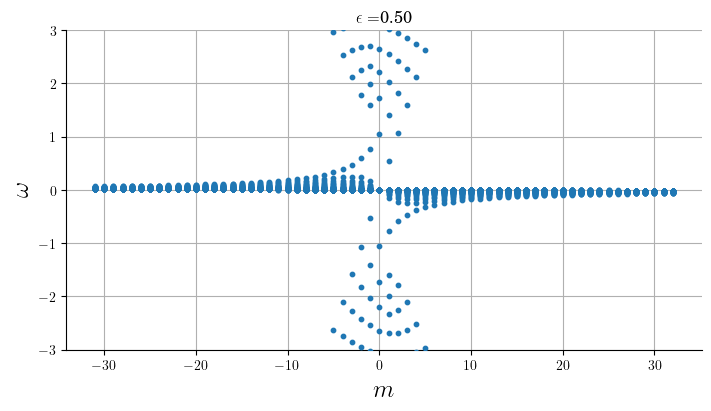

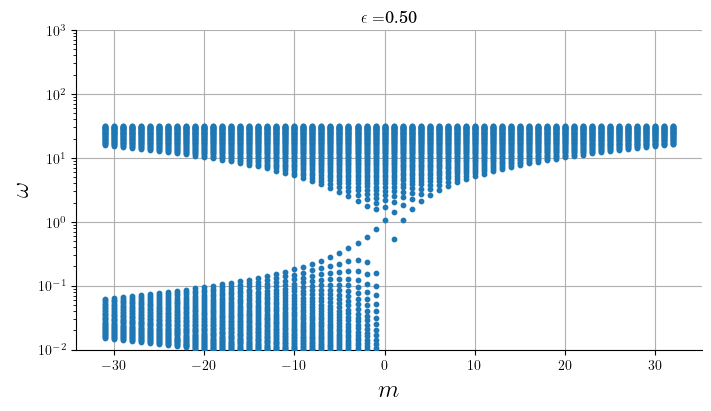

In [10]:
fig,ax = plt.subplots()
ax.grid()
ax=simpleaxis(ax,r"$m$",r"$\omega$")
ax.scatter(ms,omegas,s=10,zorder=5)
ax.set_title(r"$\epsilon = $"+"{:.2f}".format(ϵ))
ax.set_yscale("linear")
ax.set_ylim((-3,3))

# plt.savefig("figures/high_eps.pdf")
plt.show()

fig,ax = plt.subplots()
ax.grid()
ax=simpleaxis(ax,r"$m$",r"$\omega$")
ax.scatter(ms,omegas,s=10,zorder=5)
ax.set_title(r"$\epsilon = $"+"{:.2f}".format(ϵ)   )
ax.set_yscale("log")
ax.set_ylim((1e-2,1e3))

# plt.savefig("figures/high_eps.pdf")
plt.show()

In [13]:
### Obtain the eigenprofile of 1 mode
mTarget     = -1
omegaTarget =  1


# Problem
problem = d3.EVP([u,h], eigenvalue=ω, namespace=locals())
problem.add_equation("-ω*u  + ϵ*grad(h) + 2*zcross(u)  = 0")
problem.add_equation("-ω*h  + ϵ*div(u)                 = 0")

# Solve
solver     = problem.build_solver()
subproblem = solver.subproblems_by_group[(mTarget, None)]
solver.solve_dense(subproblem)
evals      = solver.eigenvalues[np.abs(solver.eigenvalues)<tol]

#grab one mode, closest to omegaTarget
idxGrab = np.argmin(np.abs(omegaTarget-solver.eigenvalues.imag))
subsys  = subproblem.subsystems[0]
solver.set_state(idxGrab,subsys)
print("omega = ",solver.eigenvalues[idxGrab],"for m = ",m)

#record
mode = np.array([u['g'][0].copy(),u['g'][1].copy(),h['g'].copy()] )

2024-03-14 15:18:04,798 subsystems 0/1 INFO :: Building subproblem matrices 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 3.3e+01/s
omega =  0.7709258195890514j for m =  -1


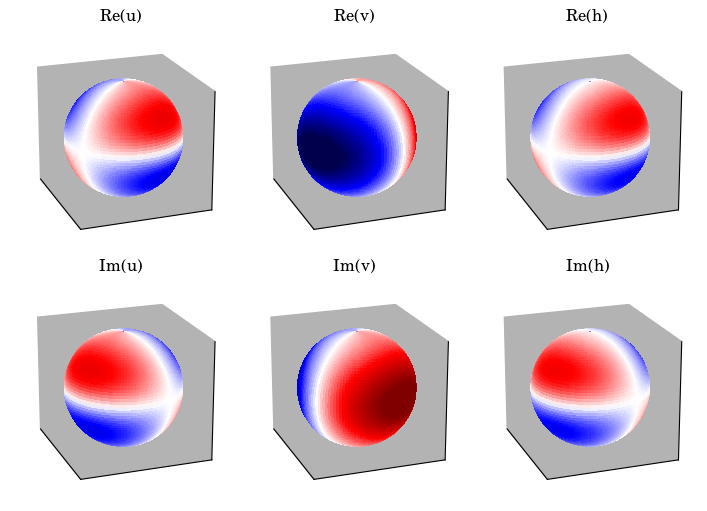

In [14]:
### Plot the obtained mode
m          = mTarget

rSphere    = 1
elev       = 20
azim       = 160
roll       = 0
luminosity = 0.9 #number between 0 and 1, for plot luminosity
figsize    = (7,5)

uMode,vMode,hMode = mode
phi,theta = dist.local_grids(basis)
phi,theta = np.meshgrid(phi,theta)
phase = np.exp(-complex(0,1)*np.angle(hMode[10,10]))
uMode,vMode,hMode = uMode*phase,vMode*phase,hMode*phase
vmax = luminosity*np.max((np.max(np.abs(uMode)),np.max(np.abs(vMode)),np.max(np.abs(hMode))))

fig = plt.figure(figsize=figsize)
phi,theta = dist.local_grids(basis)
phi,theta = np.meshgrid(phi,theta)
x = rSphere * np.sin(theta) * np.cos(phi)
y = rSphere * np.sin(theta) * np.sin(phi)
z = rSphere * np.cos(theta)
norm=colors.Normalize(vmin = -vmax, vmax = vmax, clip = False)

def plotPanelMode(panel,field,title):
    ax = fig.add_subplot(panel, projection='3d')
    ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap=cm.seismic, linewidth=0, antialiased=False,facecolors=cm.seismic(norm(field.T)))
    ax.view_init(elev=elev, azim=azim, roll=roll)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_zticks(())
    ax.set_box_aspect((1,1,0.9))
    ax.xaxis.set_pane_color((0.7, 0.7, 0.7, 1.0))
    ax.yaxis.set_pane_color((0.7, 0.7, 0.7, 1.0))
    ax.zaxis.set_pane_color((0.7, 0.7, 0.7, 1.0))
    ax.set_title(title)
    
plotPanelMode(231,uMode.real,"Re(u)")
plotPanelMode(232,vMode.real,"Re(v)")
plotPanelMode(233,hMode.real,"Re(h)")
plotPanelMode(234,uMode.imag,"Im(u)")
plotPanelMode(235,vMode.imag,"Im(v)")
plotPanelMode(236,hMode.imag,"Im(h)")
    

plt.tight_layout()
plt.show()

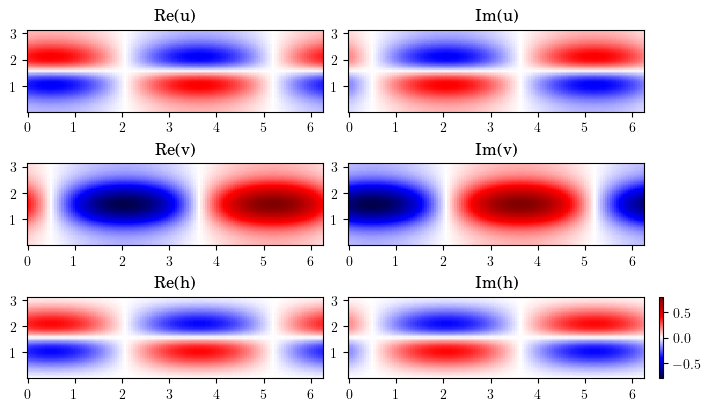

In [15]:
m = mTarget
uMode,vMode,hMode = mode
phi,theta = dist.local_grids(basis)
phi,theta = np.meshgrid(phi,theta)
phase = np.exp(-complex(0,1)*np.angle(hMode[10,10]))
uMode,vMode,hMode = uMode*phase,vMode*phase,hMode*phase
vmax = np.max((np.max(np.abs(uMode)),np.max(np.abs(vMode)),np.max(np.abs(hMode))))
fig,axs = plt.subplots(3,2)
axs[0,0].pcolormesh(phi,theta,uMode.real.T,vmin=-vmax,vmax=vmax,cmap="seismic")
axs[0,0].set_title("Re(u)")
axs[0,1].pcolormesh(phi,theta,uMode.imag.T,vmin=-vmax,vmax=vmax,cmap="seismic")
axs[0,1].set_title("Im(u)")
axs[1,0].pcolormesh(phi,theta,vMode.real.T,vmin=-vmax,vmax=vmax,cmap="seismic")
axs[1,0].set_title("Re(v)")
axs[1,1].pcolormesh(phi,theta,vMode.imag.T,vmin=-vmax,vmax=vmax,cmap="seismic")
axs[1,1].set_title("Im(v)")
axs[2,0].pcolormesh(phi,theta,hMode.real.T,vmin=-vmax,vmax=vmax,cmap="seismic")
axs[2,0].set_title("Re(h)")
im = axs[2,1].pcolormesh(phi,theta,hMode.imag.T,vmin=-vmax,vmax=vmax,cmap="seismic")
axs[2,1].set_title("Im(h)")
plt.colorbar(im)
plt.show()
# phi,theta = dist.local_grids(basis)
# plt.plot(phi,vMode.imag[:,0])